this script calculates distribution of R&D and the distribution of funded paper

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rd_path='../../data/nf_folder/Data/DerivedData/CleanedRawData/GDEXPRD_OECD.csv'
cntry_fund_frac_path='../../data/nf_folder/Data/DerivedData/Derived/cntry_fund_frac.csv'

In [31]:
output_path='../../data/nf_folder/Figs/funding_rd.pdf'

In [3]:
rd_df=pd.read_csv(rd_path)
rd_df = rd_df[rd_df.time.between(2009,2018)]
rd_df.head()

,Code,WoS,time,indicator,subject,measure,value
5,AUS,Australia,2010,GDEXPRD,TOT,MLN_USD,21422.778124
6,AUS,Australia,2011,GDEXPRD,TOT,MLN_USD,21565.684022
7,AUS,Australia,2013,GDEXPRD,TOT,MLN_USD,22467.458364
8,AUS,Australia,2015,GDEXPRD,TOT,MLN_USD,21157.076647
9,AUS,Australia,2017,GDEXPRD,TOT,MLN_USD,21226.845476


In [6]:
rd_df.time.unique()

array([2010, 2011, 2013, 2015, 2017, 2009, 2012, 2014, 2016, 2018])

In [7]:
year_cntry_rd = rd_df.pivot_table(index='time',columns='WoS',values='value',fill_value=0)
year_cntry_rd = year_cntry_rd.div(year_cntry_rd.sum(axis=1), axis=0).reset_index()
year_cntry_rd = year_cntry_rd.melt(id_vars='time',value_name='ratio')
year_cntry_rd.head()

,time,WoS,ratio
0,2009,Argentina,0.003287
1,2010,Argentina,0.003326
2,2011,Argentina,0.003375
3,2012,Argentina,0.003639
4,2013,Argentina,0.003450


In [8]:
cntrylist=['China','United States','Japan','Germany','South Korea','United Kingdom','Canada','Spain']

In [9]:
yearlist=np.arange(2009,2019)
def get_topn_ratio(data_df,timecol,valuecol,cntry_col):
    result=[]
    for year in yearlist:
        data_filter=data_df[data_df[timecol]==year]
        total=data_filter[valuecol].sum()
        top2=data_filter[data_filter[cntry_col].isin(['China','United States'])][valuecol].sum()/total
        topr=data_filter[data_filter[cntry_col].isin(cntrylist)][valuecol].sum()/total
        result.append([year,top2,topr])
    return result

In [10]:
top_rd=get_topn_ratio(rd_df,'time','value','WoS')
top_rd=pd.DataFrame(top_rd,columns=['year','top2_rd','topn_rd'])
top_rd.head()

,year,top2_rd,topn_rd
0,2009,0.482378,0.776628
1,2010,0.479027,0.768448
2,2011,0.482435,0.769987
3,2012,0.491073,0.775459
4,2013,0.497585,0.775757


In [11]:
top_rd

,year,top2_rd,topn_rd
0,2009,0.482378,0.776628
1,2010,0.479027,0.768448
2,2011,0.482435,0.769987
3,2012,0.491073,0.775459
4,2013,0.497585,0.775757
5,2014,0.509012,0.789407
6,2015,0.505921,0.771226
7,2016,0.531796,0.795097
8,2017,0.522274,0.779815
9,2018,0.546234,0.806597


In [12]:
cntry_fund_frac=pd.read_csv(cntry_fund_frac_path)
cntry_fund_frac.head()

,fund_cntry,cnt_frac,year,funded,intcol
0,Turkey,1.0,2009,1,0
1,United States,1.0,2009,1,1
2,Russia,1.0,2009,1,0
3,Spain,1.0,2009,1,0
4,Spain,1.0,2009,1,1


In [13]:
cntry_fund_frac=cntry_fund_frac.groupby(['fund_cntry','year'])['cnt_frac'].sum().reset_index()


In [14]:
cntry_fund_frac = cntry_fund_frac[cntry_fund_frac.fund_cntry!='Not-Funded']

In [15]:
top_fund=get_topn_ratio(cntry_fund_frac,'year','cnt_frac','fund_cntry')

In [18]:
top_fund_df=pd.DataFrame(top_fund,columns=['year','top2_pub','topn_pub'])
top_fund_df.head()

,year,top2_pub,topn_pub
0,2009,0.410961,0.659591
1,2010,0.406117,0.652414
2,2011,0.407931,0.647194
3,2012,0.416210,0.650592
4,2013,0.426645,0.651236


In [19]:
top_meta=top_fund_df.merge(top_rd,on=['year'])
top_meta.head()

,year,top2_pub,topn_pub,top2_rd,topn_rd
0,2009,0.410961,0.659591,0.482378,0.776628
1,2010,0.406117,0.652414,0.479027,0.768448
2,2011,0.407931,0.647194,0.482435,0.769987
3,2012,0.416210,0.650592,0.491073,0.775459
4,2013,0.426645,0.651236,0.497585,0.775757


In [128]:
year_cntry_rd_sub[year_cntry_rd_sub.time==2018]

,time,WoS,ratio
49,2018,Canada,0.013897
69,2018,China,0.243854
139,2018,Germany,0.067600
209,2018,Japan,0.090929
369,2018,South Korea,0.050081
379,2018,Spain,0.011473
429,2018,United Kingdom,0.026382
439,2018,United States,0.302380


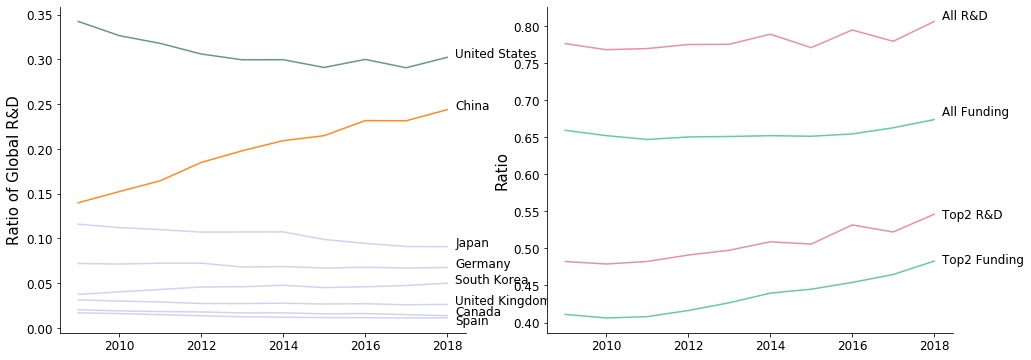

In [32]:
clist=['#FF8A25','#62988C',]+['#D0D2F2']*6

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
xlabels=np.arange(2008,2019,2)
year_cntry_rd_sub=year_cntry_rd[year_cntry_rd.WoS.isin(cntrylist)]
text_pos=dict(zip(year_cntry_rd_sub.WoS.values,np.round(year_cntry_rd_sub.ratio.values,4)))
text_pos['Spain']=0.004
sns.lineplot(x='time',y='ratio',hue='WoS',data=year_cntry_rd_sub,hue_order=cntrylist,ax=ax[0],legend=False,palette=clist)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
#ax[0].text(2018.2,0.24,'China',fontsize=12)
#ax[0].text(2018.2,0.305,'United States',fontsize=12)
for s,y in text_pos.items():
    ax[0].text(2018.2,y,s,fontsize=12)
ax[0].set_xticklabels(xlabels,fontsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].set_ylabel("Ratio of Global R&D",fontsize=15)
ax[0].set_xlabel("")

sns.lineplot(x='year',y='top2_pub',data=top_meta,ax=ax[1],color='#65CC9B',legend=False,dashes=True)
sns.lineplot(x='year',y='top2_rd',data=top_meta,ax=ax[1],color='#E88EAF',legend=False)

sns.lineplot(x='year',y='topn_pub',data=top_meta,ax=ax[1],color='#65CC9B',legend=False,dashes=True)
sns.lineplot(x='year',y='topn_rd',data=top_meta,ax=ax[1],color='#E88EAF',legend=False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].text(2018.2,0.48,'Top2 Funding',fontsize=12)
ax[1].text(2018.2,0.68,'All Funding',fontsize=12)
ax[1].text(2018.2,0.54,'Top2 R&D',fontsize=12)
ax[1].text(2018.2,0.81,'All R&D',fontsize=12)
ax[1].set_xticklabels(xlabels,fontsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].set_ylabel("Ratio",fontsize=15)
ax[1].set_xlabel("")

plt.savefig(output_path, bbox_inches='tight')